In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
single_image=X_train[0]

In [7]:
single_image.shape

(28, 28)

BALA SATHIESH C S
212222040022


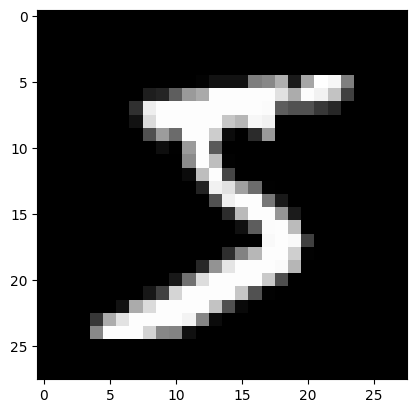

In [8]:
plt.imshow(single_image,cmap='gray')
print("BALA SATHIESH C S\n212222040022")

In [9]:
y_train.shape


(60000,)

In [10]:
X_train.min()

0

In [11]:
X_train.max()

255

In [12]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape

(60000, 10)

BALA SATHIESH C S
212222040022


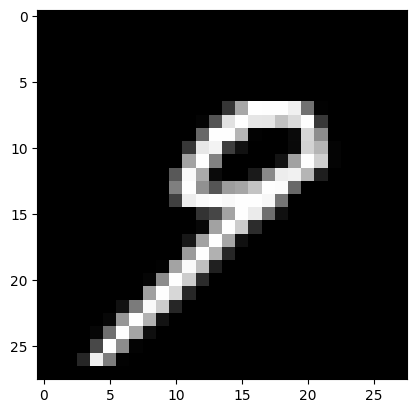

In [20]:
single_image = X_train[501]
plt.imshow(single_image,cmap='gray')
print("BALA SATHIESH C S\n212222040022")

In [28]:
y_train_onehot[501]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [22]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [23]:
model=keras.Sequential()
model.add(layers.Input(shape=((28,28,1))))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.fit(X_train_scaled ,y_train_onehot, epochs=6,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))
metrics = pd.DataFrame(model.history.history)

Epoch 1/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.8949 - loss: 0.3524 - val_accuracy: 0.9770 - val_loss: 0.0733
Epoch 2/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9820 - loss: 0.0606 - val_accuracy: 0.9846 - val_loss: 0.0480
Epoch 3/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.9885 - loss: 0.0379 - val_accuracy: 0.9846 - val_loss: 0.0450
Epoch 4/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 34ms/step - accuracy: 0.9924 - loss: 0.0270 - val_accuracy: 0.9830 - val_loss: 0.0495
Epoch 5/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9944 - loss: 0.0183 - val_accuracy: 0.9854 - val_loss: 0.0431
Epoch 6/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9966 - loss: 0.0121 - val_accuracy: 0.9868 - val_loss: 0.0449


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Name:Bala Sathiesh CS
Reg no:212222040022
[[ 975    0    0    0    0    0    3    1    1    0]
 [   0 1130    1    1    0    0    1    1    1    0]
 [   2    3 1016    0    2    0    2    4    3    0]
 [   1    0    1 1000    0    1    0    4    3    0]
 [   0    0    0    0  979    0    1    0    1    1]
 [   1    0    1   14    0  872    3    0    1    0]
 [   5    2    0    0    1    1  948    0    1    0]
 [   0    2    8    0    0    0    0 1016    1    1]
 [   5    0    4    3    2    1    1    2  952    4]
 [   1    2    0    2   13    1    0    7    3  980]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       1.00      0.98      0.99       892
       

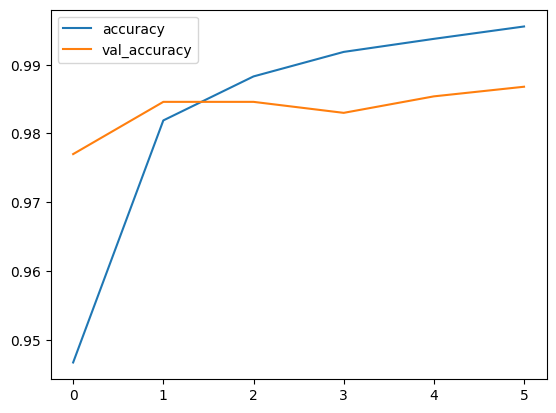

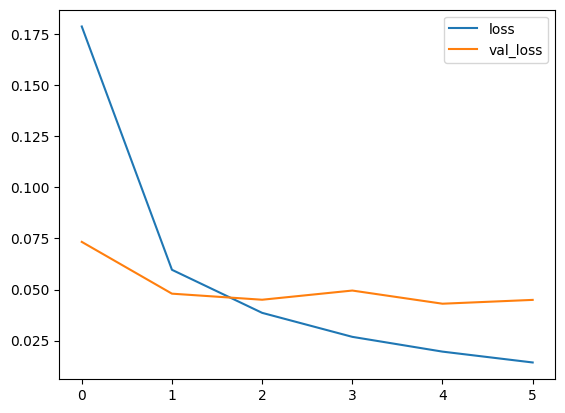

In [30]:
metrics.head()
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print("Name:Bala Sathiesh CS")
print("Reg no:212222040022")
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))


In [31]:
img = image.load_img('/content/DP image.png')

In [32]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

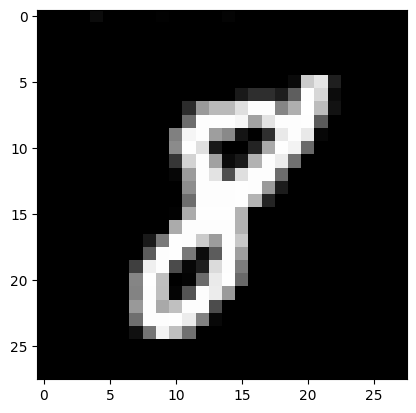

In [35]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [34]:
print(x_single_prediction)

[8]


In [33]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
